In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [10]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 3

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape(n, p)
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

print(X)
print(y)

[[-0.95571827 -0.62920824  1.39213701]
 [ 1.07837022  1.14406719  0.44282438]
 [-1.63867505  1.21307458 -0.14662062]
 ...
 [ 0.57547698 -1.04941035  0.45319347]
 [-0.39657944 -1.76139293 -0.12290388]
 [-1.44202764  1.85791871  1.80769382]]
[ 8.99212591e-01  6.44559123e+00  5.07780253e+00  5.86238477e+00
  6.00426223e+00  8.24637960e+00  7.52277388e+00 -7.75829946e-01
  5.13009171e+00  8.28945914e+00  2.76084174e+00  2.51884463e+00
  6.07187195e+00  3.70843688e+00  4.61301037e+00 -3.80127897e-01
  4.15918274e+00  4.08738797e+00  2.05391068e+00  6.08113302e+00
  5.44332159e+00  7.56092597e+00  5.82583211e+00  4.96552309e+00
  2.17615697e+00  9.45115877e-01  5.59868182e-01 -1.71156343e+00
  2.18279260e+00  1.00739575e+01  8.16571024e+00  4.42597334e+00
  7.62638490e+00  1.95225184e+00  6.75736363e+00  4.31774007e+00
  4.27914116e+00  4.28581397e+00  7.63234134e+00  9.07786457e+00
  3.18274955e+00  6.93599688e+00  8.94680822e+00  7.64836387e+00
  5.33990977e+00  3.57729960e+00  1.94437488e

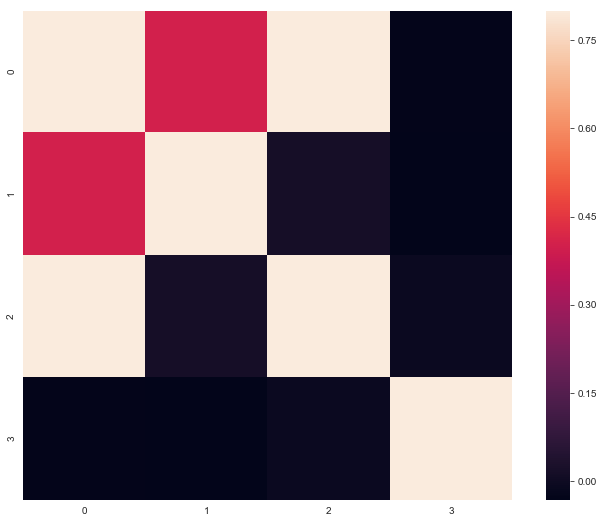

In [11]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [16]:
#de = pd.DataFrame(X)
#de[3] = y
#de

R-squared regression: 0.8376621833511215
R-squared PLSR: 0.8376621833511215


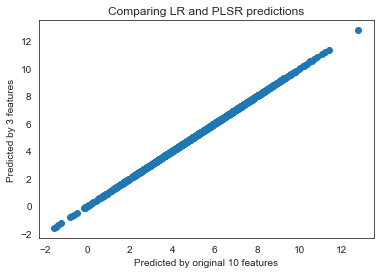

In [17]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [23]:
plsr2 = PLSRegression(n_components=1)
plsr2.fit(X,y)
Y_PLS_pred2 = plsr2.predict(X)
print('R-squared PLSR: ', plsr2.score(X, y))
#print(Y_PLS_pred2)

R-squared PLSR:  0.837246194073299
